In [1]:
data_size = 20
test_size = int(data_size*0.25)
train_size = int(data_size*0.75)
import numpy as np

x = np.linspace(0,1,data_size)
ε = np.random.normal(0,1,size=(data_size))
y = 2 * x + ε

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state =3 ,shuffle=True)

# λ = 0
# λ = 0.001/data_size
# λ = 1/data_size
λ = 1000/data_size
pol = 14
def power_mat(x,pol):
    pol += 1
    matrix = np.array([])
    for i in range(len(x)):
        tmp_lst = []
        for p in reversed(range(pol)):
            tmp_lst += [x[i] ** p]
        matrix = np.append(matrix, np.array(tmp_lst))
    matrix = matrix.reshape(-1, pol)
    return matrix
    
X_train = power_mat (X_train,pol)
X_test = power_mat (X_test,pol)

In [63]:
def Ridge_Regression(x, y, λ):
    xt = np.transpose(x)
    b = np.identity(pol+1)
    return np.dot(np.dot(np.linalg.pinv(np.dot(xt, x) + b * λ), xt), y)

def sqr_error(y_hat, y):
    return (y_hat - y) ** 2

def get_error(x,y,w):
    y_hat = np.dot(x,w)
    error = sqr_error(y_hat, y)
    return error

# 5-fold
def k_fold(X_train,y_train,pol):
    ws = np.array([])
    vaild_errors = np.array([])
    for i in range(0,5):
        X = np.array([])
        Y = np.array([])
        vaild_x = np.array([])
        vaild_y = np.array([])
        for idx in range(0,train_size):
            if idx / int(train_size/5) == i:
                vaild_x = np.append(vaild_x,X_train[idx])
                vaild_y = np.append(vaild_y,y_train[idx])
                continue
            X = np.append(X,X_train[idx])
            Y = np.append(Y,y_train[idx])
        X = X.reshape((-1,pol+1))
        vaild_x = vaild_x.reshape((-1,pol+1))
        w = Ridge_Regression(X, Y, λ)
        ws = np.append(ws,w)
        vaild_errors = np.append(vaild_errors,get_error(vaild_x,vaild_y,w))
    ws = ws.reshape(-1,pol+1)
    return ws, vaild_errors
    
#leave one out
def leave_one_out(X_train,y_train,pol):
    ws = np.array([])
    vaild_errors = np.array([])
    for idx in range(0,train_size):
        X = np.delete(X_train,idx,0)
        X = X.reshape((-1,pol+1))
        Y = np.delete(y_train,idx,0)
        w = Ridge_Regression(X, Y, λ)
        ws = np.append(ws,w)
        vaild_errors = np.append(vaild_errors,get_error(X_train[idx],y_train[idx],w))
    ws = ws.reshape(-1,pol+1)
    return ws,vaild_errors


In [64]:
w1 = Ridge_Regression(X_train,y_train, λ)
ve0 = get_error(X_train,y_train,w1)
ve0 = np.sum(ve0)/ve0.shape[0]
print ('Train error :',ve0)

ws, ve1 = k_fold(X_train,y_train,pol)
w2 = np.sum(ws,axis=0)/ws.shape[0]
print ('5-fold Cross-Vaildation error :',np.sum(ve1)/ws.shape[0])

ws, ve2 = leave_one_out(X_train,y_train,pol)
w3 = np.sum(ws,axis=0)/ws.shape[0]
print ('leave one out Cross-Vaildation error :',np.sum(ve2)/ws.shape[0])

ve3 = get_error(X_test,y_test,w1)
ve3 = np.sum(ve3)/ve3.shape[0]
print ('Test error :',ve3)

Train error : 1.387373709869004
5-fold Cross-Vaildation error : 1.6341548276723088
leave one out Cross-Vaildation error : 1.5663099350899408
Test error : 0.703051298839177


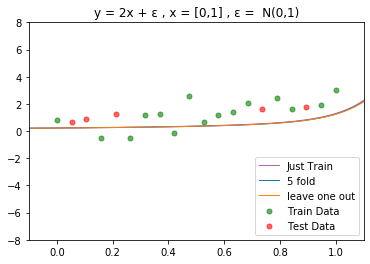

In [65]:
import matplotlib.pyplot as plt
import os
plt.title('y = 2x + ε , x = [0,1] , ε =  N(0,1)')
# plt.title('y = sin(2πx) +ε  , x = [0,1] , ε =  N(0,0.04)')
plt.scatter(X_train[:,-2], y_train, s=25, c='g', alpha = 0.6)
plt.scatter(X_test[:,-2], y_test, s=25, c='r', alpha = 0.6)
X = np.arange(-3,3,0.01)
X = power_mat(X,pol)
Y1 = np.dot (X, w1)
Y2 = np.dot (X, w2)
Y3 = np.dot (X, w3)

plt.xlim((-0.1,1.1))
plt.ylim((-8, 8))

plt.plot(X[:,-2],Y1,lw=1 , c = 'purple',alpha = 0.6)
plt.plot(X[:,-2],Y2,lw=1)
plt.plot(X[:,-2],Y3,lw=1)

plt.legend(['Just Train','5 fold','leave one out','Train Data','Test Data'], loc='lower right')
plt.savefig("{}/ML_HW1(e_{}_{}_3).png".format(os.getcwd(),pol,data_size),dpi=1000)